# LSTM and GRU

## Long Short-Term Memory(LSTM), Gated Recurrent Unit(GRU)

### Long Short-Term Memory(LSTM)
* vanilla RNN 보다 진보된 형태의 구조
* vanilla RNN의 문제 gradient vanishing 및 explosion을 해결하고, long term dependency 문제를 개선(timestep이 먼 경우에도 필요로 하는 정보를 보다 효과적으로 처리하고 학습할 수 있도록 개선)한 모델
* hidden-state를 단기 기억을 담당하는 소자로 보면, 이 단기기억을 길게 기억할 수 있도록 개선함
$$\{C_t, h_t\} = \mathrm{LSTM}(x_t, C_{t-1}, h_{t-1})$$
* $C_t$ : cell state vector
  * 여러가지 필요한 정보를 가지고 있는, 좀 더 완전한 정보를 포함하는 vector
* $h_t$ : hidden state vector
  * cell state vector를 한 번 더 가공해서 해당 timestep에서 노출할 필요가 있는 정보만 남기는, filtering된 정보를 담는 vector
* $C_t$와 $h_t$는 다음 layer의 input vector로 사용함

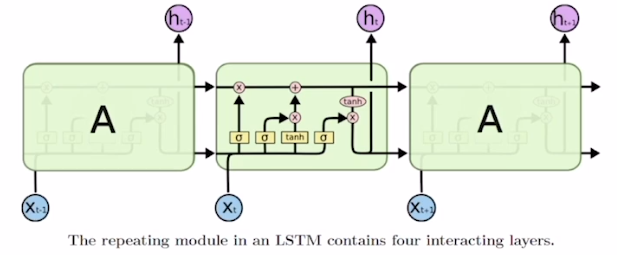




* LSTM의 연산과정
  * $x_t$와 $h_{t-1}$을 입력으로 받아 선형변환 후 출력되는 output vector를 4 개의 vector로 분할하여 각각의 vector(3개의 vector)에 원소별로 sigmoid를 거치고, 마지막 1개 vector에는 $\tanh$를 걸어주어 output 값을 생성함
  * 그림에서 $x$와 $h$의 dimension을 $h$라고 가정함
    * $x$와 $h$를 concat한 vector : $2h$
    * $h$ dimension을 가진 vector 4개를 만듬 : $4h$ <br>
    $\Rightarrow$ 선형결합의 행렬 : $4h \times 2h$
  * sigmoid 함수를 통해 나오는 vector 원소들은 0 에서 1 사이의 값을 가짐
    * sigmoid를 통해 나오는 vector는 다른 vector와 element-wise multiplication(vector가 가지는 원소를 각각 0~1 사이의 값과 곱해줌)을 통해서 원래 값이 가지던 정보에 일부 percentage만을 가지도록 하는 역할을 함
  *  $\tanh$ 을 통해 나오는 vector 원소들은 -1 에서 1 사이의 값을 가짐
    * original RNN에서 선형결합 후 $\tanh$를 통해서 최종 hidden-state vector를 -1~1 사이의 값으로서 유의미한 정보를 담는 역할을 함

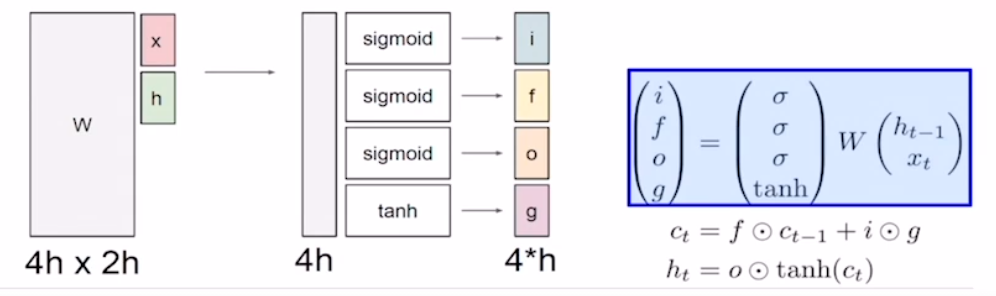

* cell state vector와 hidden state vector를 최종적으로 계산하기까지 필요로 하는 중간 결과물
  * i : Input gate, Whether to write to cell
  * f : Forget gate, Whether to erase cell
  * o : Output gate, How much to reveal cell
  * g : Gate gate, How much to write to cell

* i, f, o, g vector의 역할 : $c_{t-1}$를 적절하게 변환하는데 사용됨

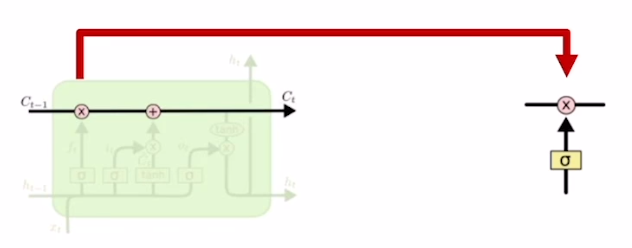

* Forget gate
  * $f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$
    * $\sigma$ : sigmoid 
  * 0.7 : 70% 보존 = 30% 를 잊음

  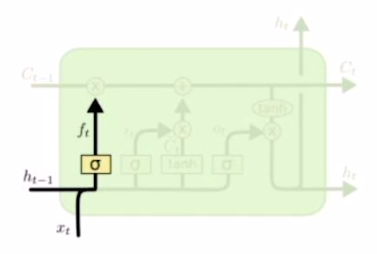

* Input gate
  * $i_t = \sigma(W_t \cdot [h_{t-1}, x_t] + b_i)$
* Gate gate
  * $\tilde{C_t} = \tanh{(W_c \cdot [h_{t-1}, x_t] + b_c)}$
  * -1 에서 1 사이의 값을 가짐
* 현재 timestep에서의 Cell-state vector
  * $C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C_t}$
    * $f_t \cdot C_{t-1}$ : 필요한 정보만 보존함
    * $i_t \cdot \tilde{C_t}$ : dimension별로 곱해서 vector를 변환함
      * 한 번의 선형변환만으로 $C_{t-1}$에 더해줄 정보를 만들기가 어려운 경우, 더해주고자 하는 값보다 큰 값들을 $\tilde{C_t}$ 형태로 만들어 준 후, 그 값에서 각 dimension별로 특정 비율 만큼의 정보를 덜어내서 실제로 $C_{t-1}$에 더해주고자 하는 정보를 만듬

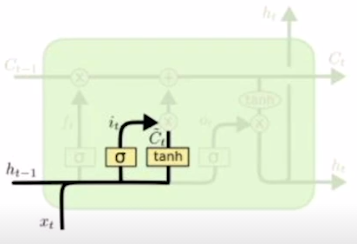



* Output gate
  * $o_t = \sigma{(W_o[h_{t-1}, x_t] + b_o)}$
  * 0 ~ 1 사이의 값을 가짐 
* Hidden-state vector
  * $h_t = o_t \cdot \tanh{(C_t)}$
    * $\tanh$를 곱함으로서 -1 ~ 1 사이의 값을 가지는 vector로 만듬
  * 해당 timestep의 예측값에 직접적으로 필요한 정보만 가지는 형태(filtering)
* $h_t$는 다음 RNN의 hidden-state vector로 넘어감과 동시에 Out layer 입력으로 줌
  * 다음에 올 단어 또는 문자를 예측하기 위해 Out layer에 넘길 vector

  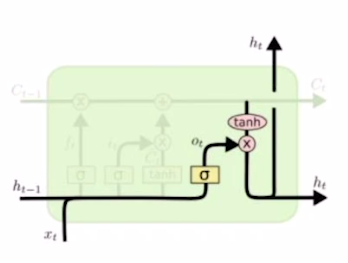

### Gated Recurrent Unit(GRU)
* LSTM을 경량화 한 RNN 구조
* 두 개의 독립된 gate로 연산을 하던 것을 하나의 gate로 계산하도록 하여 적은 memory를 요구하고 빠른 계산시간을 제공함
* 전체적인 동작은 LSTM과 비슷함
* LSTM과 달리 hidden-state vector 만 존재함
  * hidden-state vector는 cell-state vector와 비슷한 역할을 함
* $h_t$의 update 과정
  * $z_t = \sigma{(W_z \cdot [h_{t-1}, x_t])}$
  * $r_t = \sigma{(W_r \cdot [h_{t-1}, x_t])}$
  * $\tilde{h_t} = \tanh{(W \cdot [r_t \cdot h_{t-1}, x_t])}$
  * $h_t = (1 - z_t) \cdot h_{t-1} + z_t \cdot \tilde{h_t}$

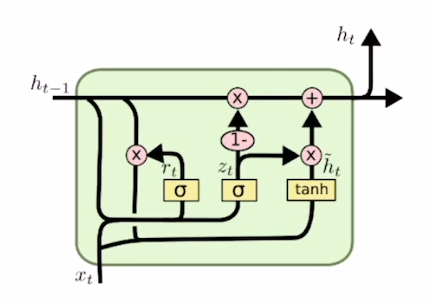


### Backpropagation in LSTM & GRU
* 필요한 정보를 곱셈이 아닌 덧셈으로 연산하여 gradient vanishing & explosion 문제를 해결
  * $+$ : backpropagation연산을 할 때, gradient를 복사해주는 연산 $\rightarrow$ 멀리 있는 연산까지 gradient를 큰 변환 없이 전달, 더 긴 timestep간에 존재하는 long timestep dependency 문제를 해결함

  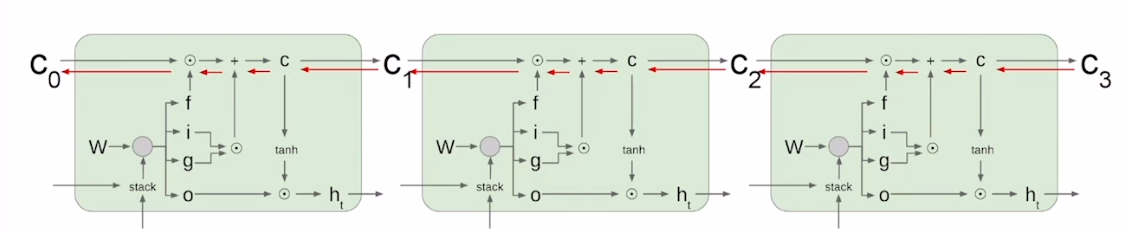

### Summary
* RNN : 다양한 길이를 가질 수 있는 Sequence data에 특화된 유연한 형태(flexibility)의 딥러닝 구조
  * Vanilla RNN(Original RNN)
    * 간단한 구조를 가짐
    * explosion 또는 gradient vanishing 문제가 있어서 많이 사용되지 않음
  * LSTM / GRU : 진보된 형태의 RNN, 많이 사용함
    * cell state vector와 hidden state vector의 연산과정이 덧셈에 기반하기 때문에 explosion 또는 gradient vanishing 문제를 피하고 long term dependency 문제를 해결